**Importing the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/My Drive/Arogo AI submission/train.xlsx"

In [ ]:
import pandas as pd

df=pd.read_excel(path)
df.head()

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes


In [ ]:
df['Traffic Conditions'].unique()

array(['Light', 'Moderate', 'Heavy'], dtype=object)

In [ ]:
df.shape

(20000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Shipment ID            20000 non-null  object        
 1   Origin                 20000 non-null  object        
 2   Destination            20000 non-null  object        
 3   Shipment Date          20000 non-null  datetime64[ns]
 4   Planned Delivery Date  20000 non-null  datetime64[ns]
 5   Actual Delivery Date   20000 non-null  datetime64[ns]
 6   Vehicle Type           19403 non-null  object        
 7   Distance (km)          20000 non-null  int64         
 8   Weather Conditions     20000 non-null  object        
 9   Traffic Conditions     20000 non-null  object        
 10  Delayed                20000 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1.7+ MB


So missing values are present in the Vehicle Type Column

**Cleaning the Dataset**

Dropping the Shipment ID column as it does not contribute to the prediction

In [ ]:
df.drop('Shipment ID', axis=1, inplace=True)

**Handling the Planned Delivery Date and the Actual Delivery date**

Here I ma making a new column which contains the number of days lying between the Planned Delivery Date and the Actual Delivery Date

In [ ]:
df['Planned Delivery Date'] = pd.to_datetime(df['Planned Delivery Date'])
df['Actual Delivery Date'] = pd.to_datetime(df['Actual Delivery Date'])

df['Delivery Delay'] = (df['Actual Delivery Date'] - df['Planned Delivery Date']).dt.days

In [ ]:
df.drop(['Planned Delivery Date','Actual Delivery Date'],axis=1,inplace=True)

**Handling the Shipment Date column**

In [ ]:
df['Shipment Date']=pd.to_datetime(df['Shipment Date'])

df['Shipment Year'] = df['Shipment Date'].dt.year
df['Shipment Month'] = df['Shipment Date'].dt.month
df['Shipment Day'] = df['Shipment Date'].dt.day

In [ ]:
df.drop('Shipment Date',axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Origin              20000 non-null  object
 1   Destination         20000 non-null  object
 2   Vehicle Type        19403 non-null  object
 3   Distance (km)       20000 non-null  int64 
 4   Weather Conditions  20000 non-null  object
 5   Traffic Conditions  20000 non-null  object
 6   Delayed             20000 non-null  object
 7   Delivery Delay      20000 non-null  int64 
 8   Shipment Year       20000 non-null  int32 
 9   Shipment Month      20000 non-null  int32 
 10  Shipment Day        20000 non-null  int32 
dtypes: int32(3), int64(2), object(6)
memory usage: 1.4+ MB


In [ ]:
df['Origin'].unique()

array(['Jaipur', 'Bangalore', 'Mumbai', 'Hyderabad', 'Chennai', 'Kolkata',
       'Lucknow', 'Delhi', 'Ahmedabad', 'Pune'], dtype=object)

In [ ]:
df['Destination'].unique()

array(['Mumbai', 'Delhi', 'Chennai', 'Ahmedabad', 'Kolkata', 'Lucknow',
       'Bangalore', 'Pune', 'Jaipur', 'Hyderabad'], dtype=object)

**Handling the Origin and Destination column**

Target Encoding for Linear classification models like Linear Regression

In [ ]:
df1=df.copy()

In [ ]:
df1['Delayed']=df1['Delayed'].replace({'Yes': 1, 'No': 0})

origin_target_mean = df1.groupby('Origin')['Delayed'].mean()
destination_target_mean = df1.groupby('Destination')['Delayed'].mean()

df1['Origin'] = df1['Origin'].map(origin_target_mean)
df1['Destination'] = df1['Destination'].map(destination_target_mean)


<ipython-input-19-8cb08d4aca34>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Delayed']=df1['Delayed'].replace({'Yes': 1, 'No': 0})


In [ ]:
print(destination_target_mean)

Destination
Ahmedabad    0.746521
Bangalore    0.739173
Chennai      0.725759
Delhi        0.735116
Hyderabad    0.761393
Jaipur       0.724560
Kolkata      0.744078
Lucknow      0.728304
Mumbai       0.734818
Pune         0.740070
Name: Delayed, dtype: float64


Label Encoding for tree based models like Xgboost,Random Forest

In [ ]:
df2=df.copy()

df2['Delayed']=df2['Delayed'].replace({'Yes': 1, 'No': 0})

from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le_origin = LabelEncoder()
le_destination = LabelEncoder()

# Apply label encoding
df2['Origin'] = le_origin.fit_transform(df2['Origin'])
df2['Destination'] = le_destination.fit_transform(df2['Destination'])

<ipython-input-11-b03b50cdc72f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Delayed']=df2['Delayed'].replace({'Yes': 1, 'No': 0})


In [ ]:
origin_mapping = dict(zip(le_origin.classes_, le_origin.transform(le_origin.classes_)))
destination_mapping = dict(zip(le_destination.classes_, le_destination.transform(le_destination.classes_)))

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Origin              20000 non-null  int64 
 1   Destination         20000 non-null  int64 
 2   Vehicle Type        19403 non-null  object
 3   Distance (km)       20000 non-null  int64 
 4   Weather Conditions  20000 non-null  object
 5   Traffic Conditions  20000 non-null  object
 6   Delayed             20000 non-null  int64 
 7   Delivery Delay      20000 non-null  int64 
 8   Shipment Year       20000 non-null  int32 
 9   Shipment Month      20000 non-null  int32 
 10  Shipment Day        20000 non-null  int32 
dtypes: int32(3), int64(5), object(3)
memory usage: 1.4+ MB


**Handling the Weather Conditions and Traffic Conditions**

Using the One hot encoding on both the columns

In [ ]:
df1_onehot=pd.get_dummies(df1,columns=['Weather Conditions','Traffic Conditions'],drop_first=True,dtype=int)
# df2_onehot=pd.get_dummies(df2,columns=['Weather Conditions','Traffic Conditions'],drop_first=True,dtype=int)

In [ ]:
df1_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Origin                       20000 non-null  float64
 1   Destination                  20000 non-null  float64
 2   Vehicle Type                 19403 non-null  object 
 3   Distance (km)                20000 non-null  int64  
 4   Delayed                      20000 non-null  int64  
 5   Delivery Delay               20000 non-null  int64  
 6   Shipment Year                20000 non-null  int32  
 7   Shipment Month               20000 non-null  int32  
 8   Shipment Day                 20000 non-null  int32  
 9   Weather Conditions_Fog       20000 non-null  int64  
 10  Weather Conditions_Rain      20000 non-null  int64  
 11  Weather Conditions_Storm     20000 non-null  int64  
 12  Traffic Conditions_Light     20000 non-null  int64  
 13  Traffic Conditio

**Handling the missing values in the Vehicle Type column**

In [ ]:
df['Vehicle Type'].value_counts()

,count
Vehicle Type,
Lorry,4878
Truck,4860
Trailer,4838
Container,4827


**As the dustribution among the 4 categories is nearly equal so we cannot use the Mode imputation method**

Plotting for checking relationship between the Origin City and Vehicle Type

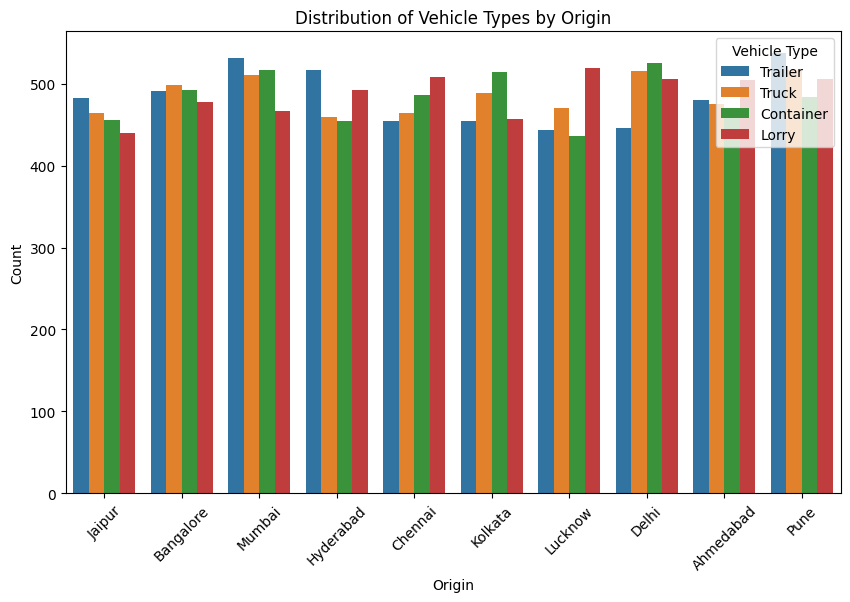

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Origin', hue='Vehicle Type')

# Add labels and title
plt.title('Distribution of Vehicle Types by Origin')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.legend(title='Vehicle Type')
plt.xticks(rotation=45)
plt.show()


Plotting for checking the relationship between Destination City and Vehicle Type

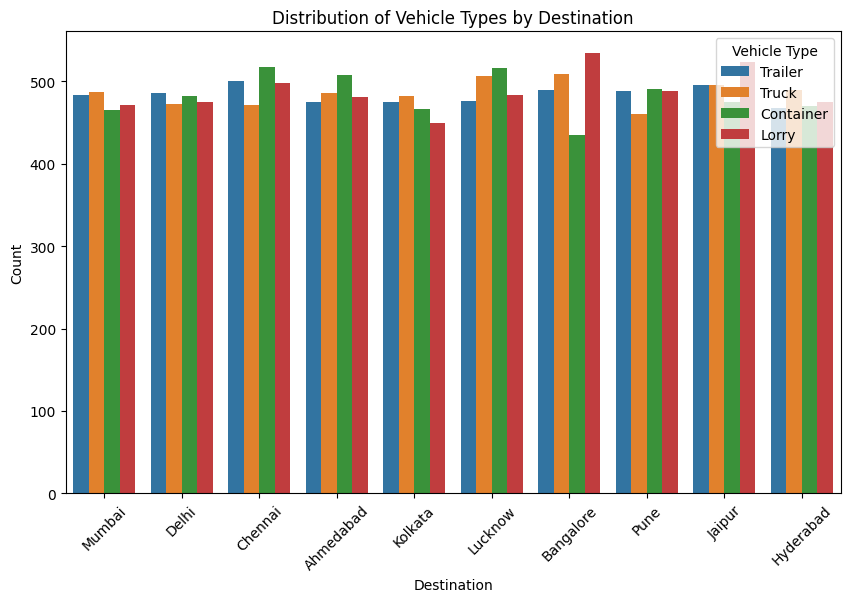

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Destination', hue='Vehicle Type')

# Add labels and title
plt.title('Distribution of Vehicle Types by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.legend(title='Vehicle Type')
plt.xticks(rotation=45)
plt.show()


So we can infer that there is no relationshop between Origin city and Vehicle Type and Destination cty and Vehicle Type

So using the Similarity based imputation

In [ ]:
train_data1 = df1_onehot[df1_onehot['Vehicle Type'].notna()]
missing_data1 = df1_onehot[df1_onehot['Vehicle Type'].isna()]

# train_data2 = df2_onehot[df2_onehot['Vehicle Type'].notna()]
# missing_data2 = df2_onehot[df2_onehot['Vehicle Type'].isna()]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
X_train2 = train_data2.drop(columns=['Vehicle Type'])
y_train2 = train_data2['Vehicle Type']
clf.fit(X_train2, y_train2)

X_missing2 = missing_data2.drop(columns=['Vehicle Type'])
missing_data2['Vehicle Type'] = clf.predict(X_missing2)

<ipython-input-16-bc6f0a4a5bc3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data2['Vehicle Type'] = clf.predict(X_missing2)


In [ ]:
df2_final=pd.concat([train_data2,missing_data2])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X_train1 = train_data1.drop(columns=['Vehicle Type'])
y_train1 = train_data1['Vehicle Type']
model.fit(X_train1,y_train1)

X_missing1 = missing_data1.drop(columns=['Vehicle Type'])
missing_data1['Vehicle Type'] = model.predict(X_missing1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-26-7f6c4f2e0119>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data1['Vehicle Type'] = model.predict(X_missing1)


In [ ]:
df1_final=pd.concat([train_data1,missing_data1])

In [ ]:
df1_final.shape

(20000, 14)

**Using the One hot encoding on the Vehicle Type column**

In [ ]:
df1_final=pd.get_dummies(df1_final,columns=['Vehicle Type'],drop_first=True,dtype=int)
# df2_final=pd.get_dummies(df2_final,columns=['Vehicle Type'],drop_first=True,dtype=int)

In [ ]:
df1_final.head()

,Origin,Destination,Distance (km),Delayed,Delivery Delay,Shipment Year,Shipment Month,Shipment Day,Weather Conditions_Fog,Weather Conditions_Rain,Weather Conditions_Storm,Traffic Conditions_Light,Traffic Conditions_Moderate,Vehicle Type_Lorry,Vehicle Type_Trailer,Vehicle Type_Truck
0,0.742257,0.734818,1603,1,1,2023,4,26,0,1,0,1,0,0,1,0
1,0.738916,0.735116,1237,1,4,2023,2,9,0,0,1,0,1,0,1,0
2,0.733879,0.725759,1863,0,0,2023,9,19,0,0,0,1,0,0,0,1
3,0.739504,0.746521,1374,0,0,2023,4,1,0,0,0,1,0,0,0,0
4,0.747852,0.744078,676,1,2,2023,11,24,0,0,0,0,0,0,0,0


In [ ]:
df1_final['Target']=df1_final['Delayed']
# df2_final['Target']=df2_final['Delayed']
df1_final.drop('Delayed',axis=1, inplace=True)
# df2_final.drop('Delayed',axis=1, inplace=True)

In [ ]:
df1_final.head()

,Origin,Destination,Distance (km),Delivery Delay,Shipment Year,Shipment Month,Shipment Day,Weather Conditions_Fog,Weather Conditions_Rain,Weather Conditions_Storm,Traffic Conditions_Light,Traffic Conditions_Moderate,Vehicle Type_Lorry,Vehicle Type_Trailer,Vehicle Type_Truck,Target
0,0.742257,0.734818,1603,1,2023,4,26,0,1,0,1,0,0,1,0,1
1,0.738916,0.735116,1237,4,2023,2,9,0,0,1,0,1,0,1,0,1
2,0.733879,0.725759,1863,0,2023,9,19,0,0,0,1,0,0,0,1,0
3,0.739504,0.746521,1374,0,2023,4,1,0,0,0,1,0,0,0,0,0
4,0.747852,0.744078,676,2,2023,11,24,0,0,0,0,0,0,0,0,1


In [ ]:
df1_final.columns

Index(['Origin', 'Destination', 'Distance (km)', 'Delivery Delay',
       'Shipment Year', 'Shipment Month', 'Shipment Day',
       'Weather Conditions_Fog', 'Weather Conditions_Rain',
       'Weather Conditions_Storm', 'Traffic Conditions_Light',
       'Traffic Conditions_Moderate', 'Vehicle Type_Lorry',
       'Vehicle Type_Trailer', 'Vehicle Type_Truck', 'Target'],
      dtype='object')

**Performing the Exploratory Data Analysis to find useful Features**

Using pairplot

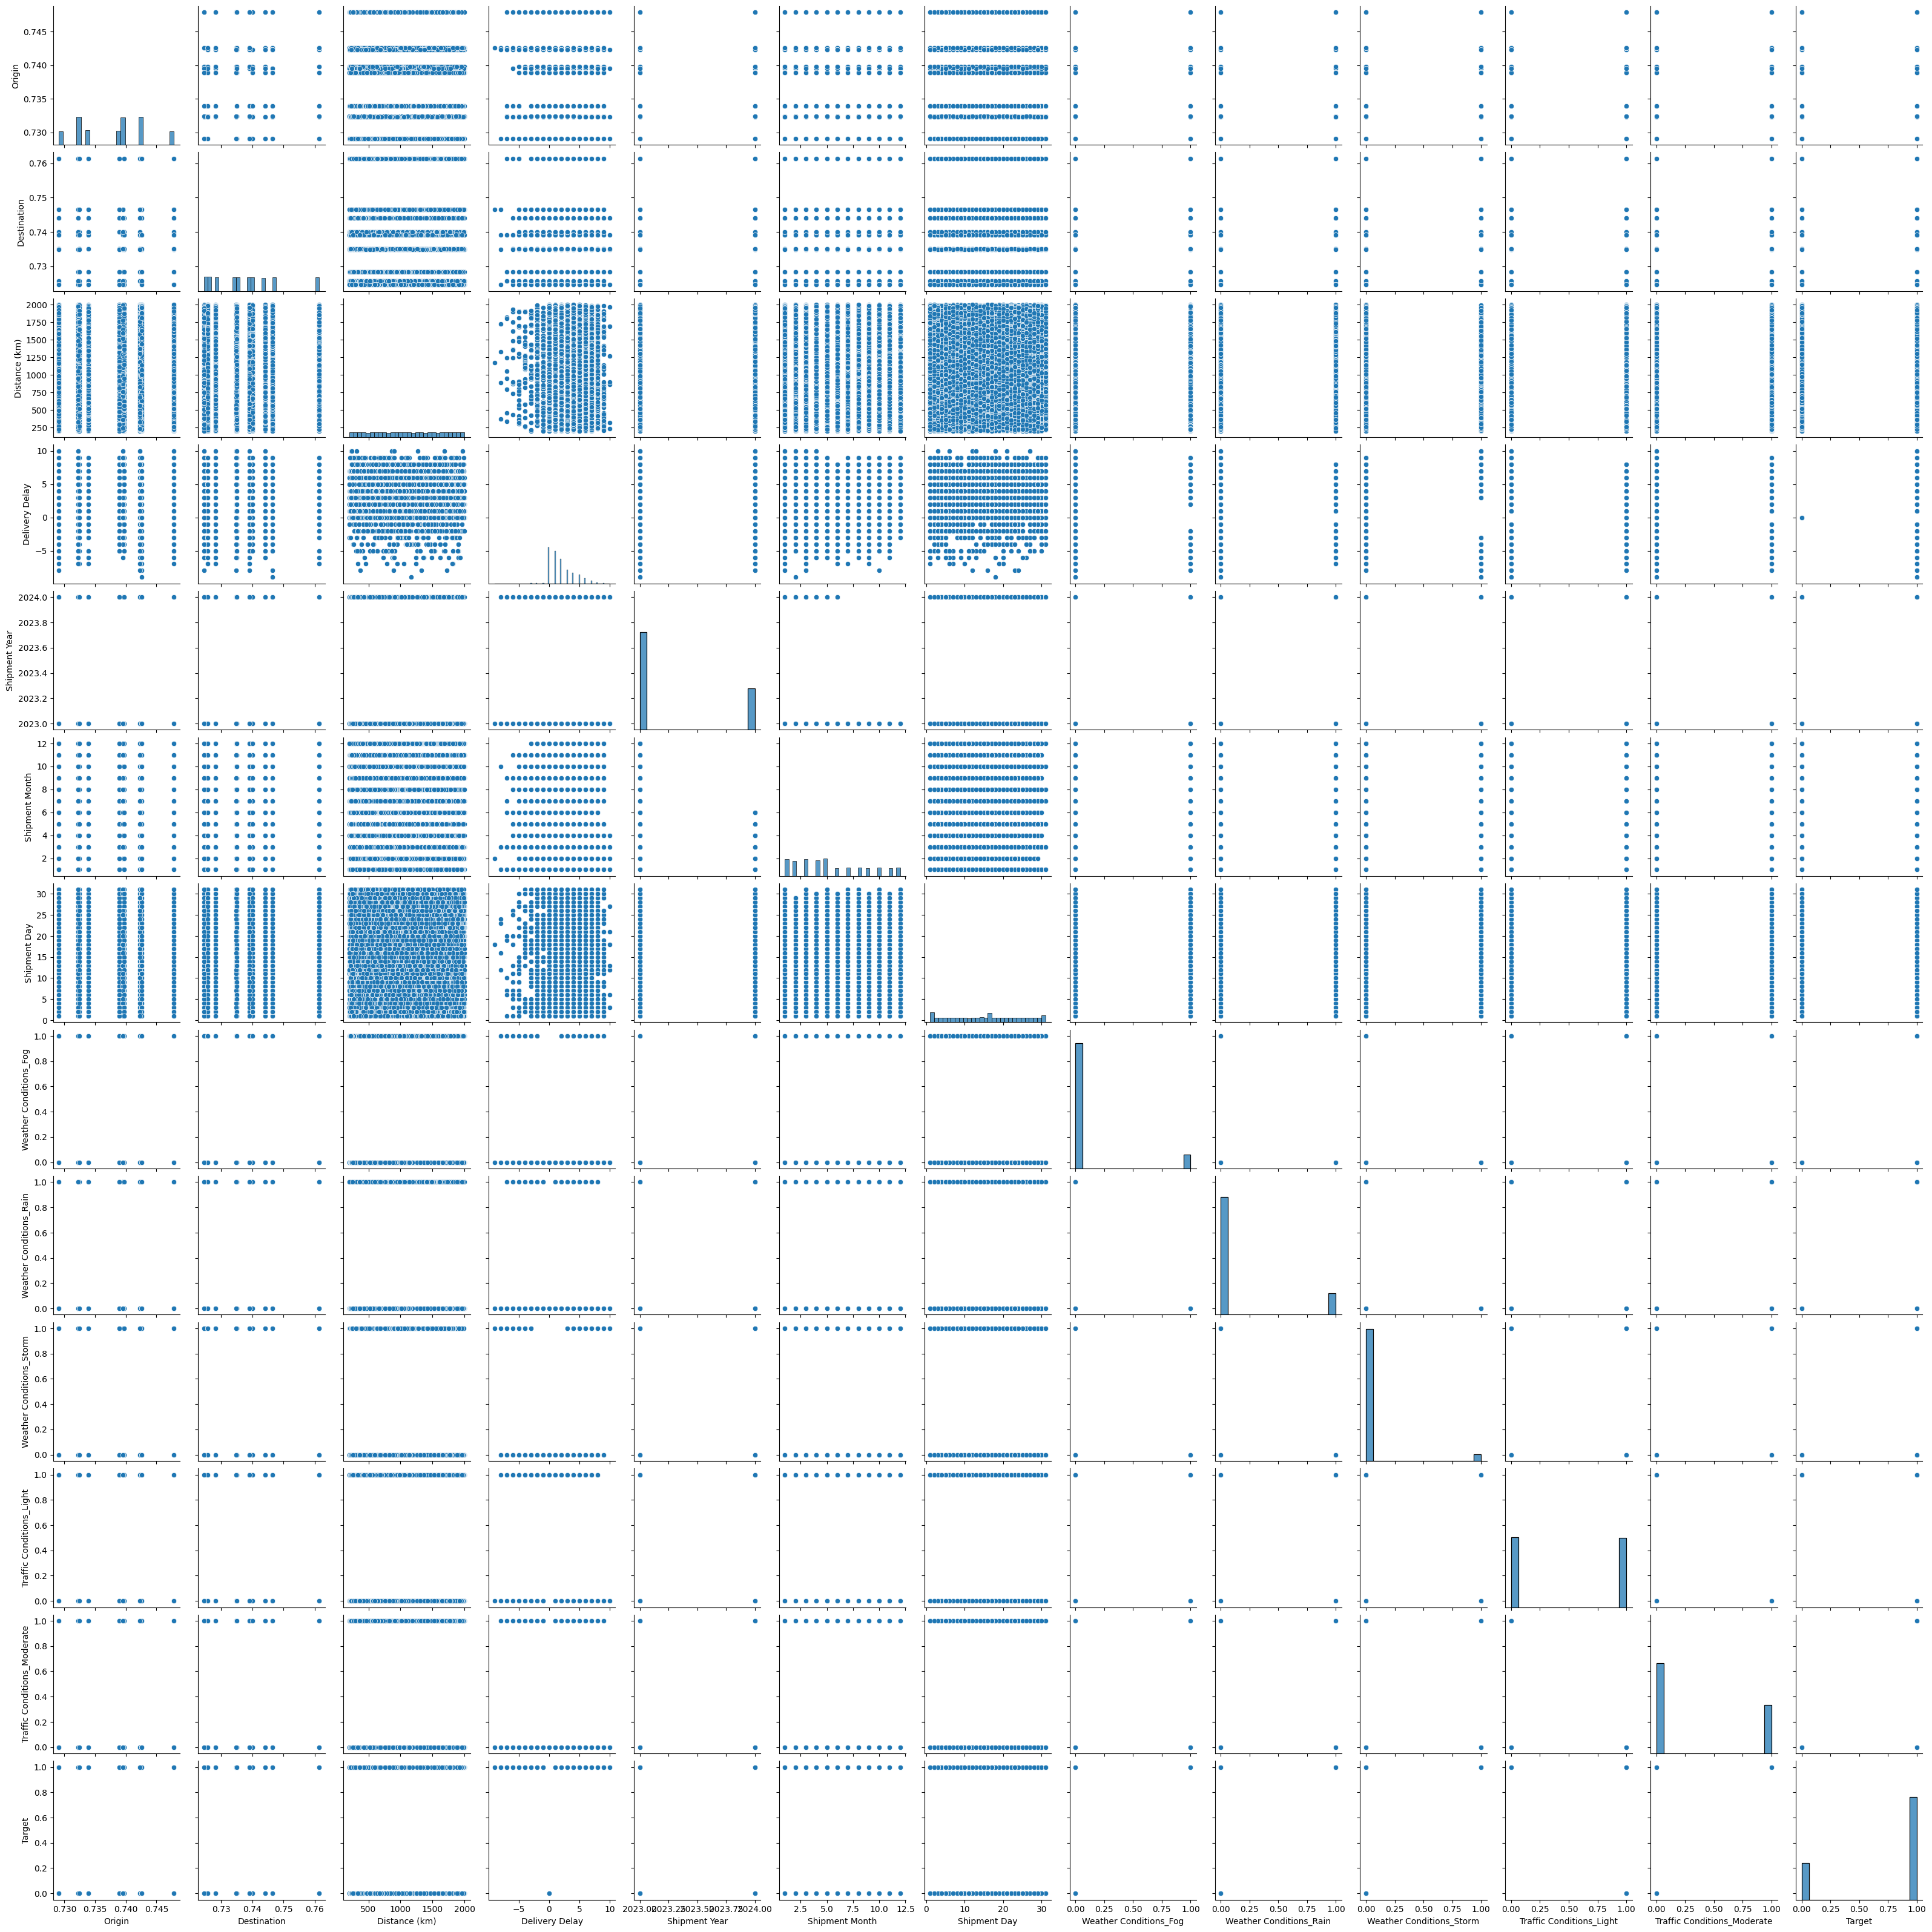

In [ ]:
sns.pairplot(df1_final)

**Using the Heatmap**

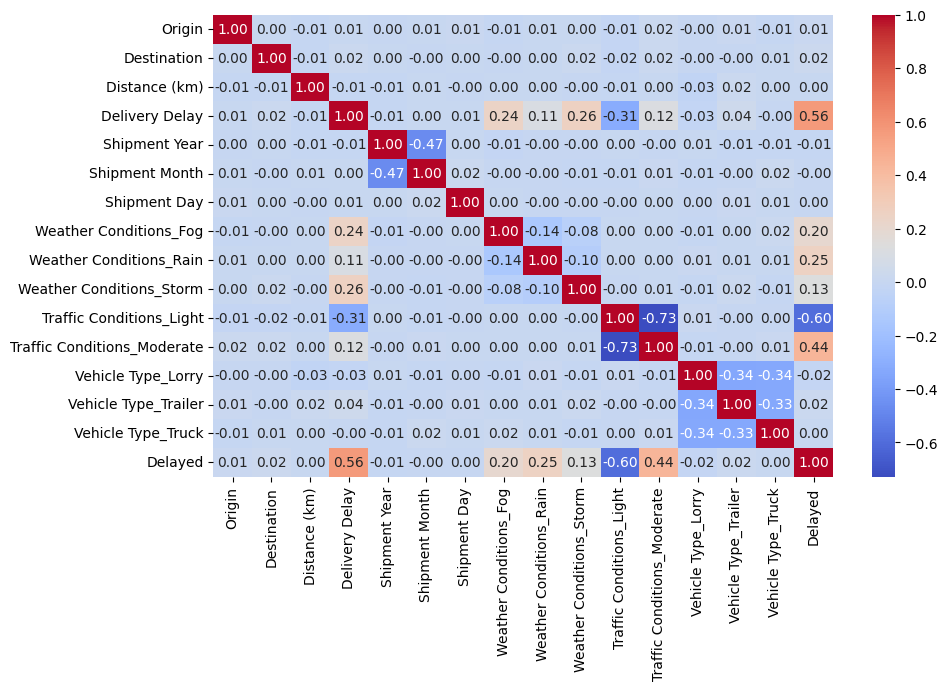

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df1_final.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


**Building the model**

In [ ]:
df1_final['Target'].value_counts()

,count
Target,
1,14757
0,5243


So here as the target classes are highly imbalanced and we not provided woth seperate dataset for training purpose so here the  K-Fold Cross-Validation with Stratified Sampling is desirable

**1)Logistic Regression Model**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import numpy as np


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

x_1=df1_final.drop('Target',axis=1)
y_1=df1_final['Target']

log_reg_model=LogisticRegression(max_iter=200)
log_reg_scores = []
roc_auc_scores = []
f1_scores = []

for train_index, val_index in skf.split(x_1, y_1):
    X_train_fold, X_val_fold = x_1.iloc[train_index], x_1.iloc[val_index]
    y_train_fold, y_val_fold = y_1.iloc[train_index], y_1.iloc[val_index]

    # Logistic Regression
    log_reg_model.fit(X_train_fold, y_train_fold)
    log_reg_pred = log_reg_model.predict(X_val_fold)
    log_reg_scores.append(accuracy_score(y_val_fold, log_reg_pred))
    roc_auc_scores.append(roc_auc_score(y_val_fold, log_reg_pred))
    f1_scores.append(f1_score(y_val_fold, log_reg_pred))

print(f"Logistic Regression Mean Accuracy (K-Fold): {np.mean(log_reg_scores) * 100:.2f}%")
print(f"Logistic Regression Mean ROC AUC Score (K-Fold): {np.mean(roc_auc_scores) * 100:.2f}%")
print(f"Logistic Regression Mean F1 Score (K-Fold): {np.mean(f1_scores) * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Mean Accuracy (K-Fold): 99.55%
Logistic Regression Mean ROC AUC Score (K-Fold): 99.70%
Logistic Regression Mean F1 Score (K-Fold): 99.70%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

x_2=df2_final.drop('Target',axis=1)
y_2=df2_final['Target']

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
log_reg_scores = []
roc_auc_scores = []
f1_scores = []

for train_index, val_index in skf.split(x_2, y_2):
    X_train_fold, X_val_fold = x_2.iloc[train_index], x_2.iloc[val_index]
    y_train_fold, y_val_fold = y_2.iloc[train_index], y_2.iloc[val_index]

    # Logistic Regression
    rf_model.fit(X_train_fold, y_train_fold)
    rf_pred = rf_model.predict(X_val_fold)
    log_reg_scores.append(accuracy_score(y_val_fold, log_reg_pred))
    roc_auc_scores.append(roc_auc_score(y_val_fold, log_reg_pred))
    f1_scores.append(f1_score(y_val_fold, log_reg_pred))

print(f"Random Forest Mean Accuracy (K-Fold): {np.mean(log_reg_scores) * 100:.2f}%")
print(f"Random Forest Mean ROC AUC Score (K-Fold): {np.mean(roc_auc_scores) * 100:.2f}%")
print(f"Random Forest Mean F1 Score (K-Fold): {np.mean(f1_scores) * 100:.2f}%")


Random Forest Mean Accuracy (K-Fold): 65.00%
Random Forest Mean ROC AUC Score (K-Fold): 54.99%
Random Forest Mean F1 Score (K-Fold): 76.22%


Obtaining less accuracy with the Random Forest model hence doing hyperparameter tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(x_2, y_2)

# Print the best hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
# y_pred_rf = best_rf_model.predict(X_val)
# accuracy_rf = accuracy_score(y_val, y_pred_rf)
# print(f"Random Forest Accuracy with Tuning: {accuracy_rf * 100:.2f}%")


Fitting 2 folds for each of 108 candidates, totalling 216 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

log_reg_scores = []
roc_auc_scores = []
f1_scores = []

for train_index, val_index in skf.split(x_2, y_2):
    X_train_fold, X_val_fold = x_2.iloc[train_index], x_2.iloc[val_index]
    y_train_fold, y_val_fold = y_2.iloc[train_index], y_2.iloc[val_index]

    # Logistic Regression
    rf_pred = best_rf_model.predict(X_val_fold)
    log_reg_scores.append(accuracy_score(y_val_fold, log_reg_pred))
    roc_auc_scores.append(roc_auc_score(y_val_fold, log_reg_pred))
    f1_scores.append(f1_score(y_val_fold, log_reg_pred))

print(f"Random Forest Mean Accuracy (K-Fold): {np.mean(log_reg_scores) * 100:.2f}%")
print(f"Random Forest Mean ROC AUC Score (K-Fold): {np.mean(roc_auc_scores) * 100:.2f}%")
print(f"Random Forest Mean F1 Score (K-Fold): {np.mean(f1_scores) * 100:.2f}%")


Random Forest Mean Accuracy (K-Fold): 65.00%
Random Forest Mean ROC AUC Score (K-Fold): 54.99%
Random Forest Mean F1 Score (K-Fold): 76.22%


As outliers can negatively the random forest classification hence removing the outiers

In [ ]:
from scipy.stats import zscore

rf_model = RandomForestClassifier(random_state=42)

# Compute Z-scores
z_scores = zscore(x_2)

# Identify outliers (Z-score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Remove outliers from the dataset
X_train_clean = x_2[~outliers.any(axis=1)]
y_train_clean = y_2[~outliers.any(axis=1)]

# Train Random Forest with cleaned data
rf_model.fit(X_train_clean, y_train_clean)

og_reg_scores = []
roc_auc_scores = []
f1_scores = []

for train_index, val_index in skf.split(x_2, y_2):
    X_train_fold, X_val_fold = x_2.iloc[train_index], x_2.iloc[val_index]
    y_train_fold, y_val_fold = y_2.iloc[train_index], y_2.iloc[val_index]

    # Logistic Regression
    rf_pred = rf_model.predict(X_val_fold)
    log_reg_scores.append(accuracy_score(y_val_fold, log_reg_pred))
    roc_auc_scores.append(roc_auc_score(y_val_fold, log_reg_pred))
    f1_scores.append(f1_score(y_val_fold, log_reg_pred))

print(f"Random Forest Mean Accuracy (K-Fold): {np.mean(log_reg_scores) * 100:.2f}%")
print(f"Random Forest Mean ROC AUC Score (K-Fold): {np.mean(roc_auc_scores) * 100:.2f}%")
print(f"Random Forest Mean F1 Score (K-Fold): {np.mean(f1_scores) * 100:.2f}%")




Random Forest Mean Accuracy (K-Fold): 65.00%
Random Forest Mean ROC AUC Score (K-Fold): 54.99%
Random Forest Mean F1 Score (K-Fold): 76.22%


**Trying XGboost model**

In [ ]:
import xgboost as xgb

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

x_2=df2_final.drop('Target',axis=1)
y_2=df2_final['Target']

xgb_model = xgb.XGBClassifier(random_state=42)
log_reg_scores = []
roc_auc_scores = []
f1_scores = []

for train_index, val_index in skf.split(x_2, y_2):
    X_train_fold, X_val_fold = x_2.iloc[train_index], x_2.iloc[val_index]
    y_train_fold, y_val_fold = y_2.iloc[train_index], y_2.iloc[val_index]

    # Logistic Regression
    xgb_model.fit(X_train_fold, y_train_fold)
    rf_pred = xgb_model.predict(X_val_fold)
    log_reg_scores.append(accuracy_score(y_val_fold, log_reg_pred))
    roc_auc_scores.append(roc_auc_score(y_val_fold, log_reg_pred))
    f1_scores.append(f1_score(y_val_fold, log_reg_pred))

print(f"Random Forest Mean Accuracy (K-Fold): {np.mean(log_reg_scores) * 100:.2f}%")
print(f"Random Forest Mean ROC AUC Score (K-Fold): {np.mean(roc_auc_scores) * 100:.2f}%")
print(f"Random Forest Mean F1 Score (K-Fold): {np.mean(f1_scores) * 100:.2f}%")


Random Forest Mean Accuracy (K-Fold): 65.00%
Random Forest Mean ROC AUC Score (K-Fold): 54.99%
Random Forest Mean F1 Score (K-Fold): 76.22%


**Conclusion**

We are getting a very good accuracy with Logistic Regression model and hence selecting it

**Saving the model**

In [ ]:
import pickle

model_path="/content/drive/My Drive/Arogo AI submission/model.pkl"

with open(model_path, 'wb') as file:
    pickle.dump(log_reg_model, file)